<a href="https://colab.research.google.com/github/GeorgiNikZlatev/Python_Data_Cleaning-VisualizationVi/blob/main/Python_Data_Cleaning%26Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas, Matplotlib and Seaborn

In [11]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

[Dataset Soruce](https://www.kaggle.com/datasets/rajkumarpandey02/gdp-in-usd-per-capita-income-by-country)

CONTENT
<p>The figures presented here do not take into account differences in the cost of living in different countries, and the results vary greatly from one year to another based on fluctuations in the exchange rates of the country's currency. Such fluctuations change a country's ranking from one year to the next, even though they often make little or no difference to the standard of living of its population.

GDP per capita is often considered an indicator of a country's standard of living; however, this is inaccurate because GDP per capita is not a measure of personal income.

Comparisons of national income are also frequently made on the basis of purchasing power parity (PPP), to adjust for differences in the cost of living in different countries. (See List of countries by GDP (PPP) per capita.) PPP largely removes the exchange rate problem but not others; it does not reflect the value of economic output in international trade, and it also requires more estimation than GDP per capita. On the whole, PPP per capita figures are more narrowly spread than nominal GDP per capita figures.</p>

In [14]:
df = pd.read_csv("GDP (nominal) per Capita.csv", index_col=0)

#EDA (Exploratory Data Analysis)

In [15]:
#View first 10 entries of the dataset
df.head(10)

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021
6,Norway,Europe,101103,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767,2023,91992,2021,93525,2021
8,Singapore,Asia,91100,2023,72794,2021,66822,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
10,Cayman Islands,Americas,0,0,86569,2021,85250,2021


In [16]:
#Number of rows and columns, columns names and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 1 to 223
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country/Territory   223 non-null    object
 1   UN_Region           223 non-null    object
 2   IMF_Estimate        223 non-null    int64 
 3   IMF_Year            223 non-null    int64 
 4   WorldBank_Estimate  223 non-null    int64 
 5   WorldBank_Year      223 non-null    int64 
 6   UN_Estimate         223 non-null    int64 
 7   UN_Year             223 non-null    object
dtypes: int64(5), object(3)
memory usage: 15.7+ KB


In [17]:
#Change dtype of UN_Year Column
df = df.astype({'UN_Year':object, 'WorldBank_Year':object,'IMF_Year':object})

In [18]:
#changind the invalid dtype of '[n 10]2021'
df.index[df['UN_Year'] == '[n 10]2021']

Int64Index([194], dtype='int64')

In [19]:
df.loc[194, 'UN_Year'] = 2021
df.loc[194]

Country/Territory     Tanzania
UN_Region               Africa
IMF_Estimate              1348
IMF_Year                  2023
WorldBank_Estimate        1099
WorldBank_Year            2021
UN_Estimate               1136
UN_Year                   2021
Name: 194, dtype: object

In [20]:
df.dtypes

Country/Territory     object
UN_Region             object
IMF_Estimate           int64
IMF_Year              object
WorldBank_Estimate     int64
WorldBank_Year        object
UN_Estimate            int64
UN_Year               object
dtype: object

In [21]:
df[df.UN_Region=="World"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
93,World,World,13440,2023,12235,2021,12230,2021


In [22]:
df[df["IMF_Estimate"]==0]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
10,Cayman Islands,Americas,0,0,86569,2021,85250,2021
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0
19,Greenland,Americas,0,0,54571,2020,58185,2021
31,British Virgin Islands,Americas,0,0,0,0,49444,2021
37,US Virgin Islands,Americas,0,0,39552,2020,0,0


In [23]:
df[df["WorldBank_Estimate"]==0]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
31,British Virgin Islands,Americas,0,0,0,0,49444,2021
46,Taiwan,Asia,33907,2023,0,0,0,0
76,Cook Islands,Oceania,0,0,0,0,19264,2021
77,Anguilla,Americas,0,0,0,0,19216,2021
85,Montserrat,Americas,0,0,0,0,16199,2021
196,Zanzibar,Africa,0,0,0,0,1211,2021
212,North Korea,Asia,0,0,0,0,654,2021


In [24]:
df[df["UN_Region"]=="Europe"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
6,Norway,Europe,101103,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767,2023,91992,2021,93525,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
13,Iceland,Europe,75180,2023,68728,2021,69133,2021
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0


In [25]:
# Checking the values of this column

df['IMF_Estimate'].value_counts()


0        26
4336      1
4251      1
4146      1
3589      1
         ..
14403     1
13721     1
13709     1
13440     1
249       1
Name: IMF_Estimate, Length: 198, dtype: int64

In [26]:
# Checking the values of this column

df['IMF_Year'].value_counts()


2023    193
0        26
2020      2
2022      2
Name: IMF_Year, dtype: int64

In [27]:
# Checking the values of this column

df['UN_Estimate'].value_counts()

0         9
234317    1
3898      1
3919      1
3573      1
         ..
10366     1
14618     1
16199     1
12207     1
311       1
Name: UN_Estimate, Length: 215, dtype: int64

In [28]:
# Checking the values of this column

df['UN_Year'].value_counts()

2021    213
0         9
2021      1
Name: UN_Year, dtype: int64

In [29]:
df[(df["IMF_Estimate"]>39940) & (df["UN_Region"]=="Europe")]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
6,Norway,Europe,101103,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767,2023,91992,2021,93525,2021
13,Iceland,Europe,75180,2023,68728,2021,69133,2021
16,Denmark,Europe,68827,2023,68008,2021,68037,2021
18,Netherlands,Europe,61098,2023,57768,2021,57871,2021
20,Austria,Europe,56802,2023,53638,2021,53840,2021
22,Sweden,Europe,55395,2023,61029,2021,60730,2021
23,Finland,Europe,54351,2023,53655,2021,53703,2021


In [30]:
df[df["UN_Region"]=="Africa"]["UN_Estimate"].mean()

2417.927272727273

In [31]:
df.sort_values(by="UN_Estimate", ascending=False).head(1)

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021


In [32]:
df[["Country/Territory", "WorldBank_Estimate"]].nlargest(1, 'WorldBank_Estimate')

,Country/Territory,WorldBank_Estimate
1,Monaco,234316


In [33]:
df[df["Country/Territory"]=="Bulgaria"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
87,Bulgaria,Europe,14893,2023,12222,2021,12207,2021


In [34]:
df[df["Country/Territory"].str.contains("United")]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
12,United States,Americas,80034,2023,70249,2021,69185,2021
30,United Arab Emirates,Asia,49451,2023,44316,2021,43295,2021
33,United Kingdom,Europe,46371,2023,46510,2021,46542,2021


## Checking Missing Values

In [35]:
#Cheking for missing values in each column
df.isnull().sum()

Country/Territory     0
UN_Region             0
IMF_Estimate          0
IMF_Year              0
WorldBank_Estimate    0
WorldBank_Year        0
UN_Estimate           0
UN_Year               0
dtype: int64

In [36]:
df.shape

(223, 8)

In [37]:
df.dropna().shape

(223, 8)

In [38]:
df.replace(0, np.nan, inplace=True)

In [39]:
df.dropna(inplace=True)
df

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
3,Luxembourg,Europe,132372.000,2023.000,133590.000,2021.000,133745.000,2021
4,Ireland,Europe,114581.000,2023.000,100172.000,2021.000,101109.000,2021
6,Norway,Europe,101103.000,2023.000,89154.000,2021.000,89242.000,2021
7,Switzerland,Europe,98767.000,2023.000,91992.000,2021.000,93525.000,2021
8,Singapore,Asia,91100.000,2023.000,72794.000,2021.000,66822.000,2021
...,...,...,...,...,...,...,...,...
219,Malawi,Africa,496.000,2023.000,635.000,2021.000,613.000,2021
220,South Sudan,Africa,467.000,2023.000,1072.000,2015.000,400.000,2021
221,Sierra Leone,Africa,415.000,2023.000,480.000,2021.000,505.000,2021
222,Afghanistan,Asia,611.000,2020.000,369.000,2021.000,373.000,2021


In [40]:
df.shape

(196, 8)

In [41]:
df = df.astype({'WorldBank_Year':int,'IMF_Year':int})

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 3 to 223
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country/Territory   196 non-null    object 
 1   UN_Region           196 non-null    object 
 2   IMF_Estimate        196 non-null    float64
 3   IMF_Year            196 non-null    int64  
 4   WorldBank_Estimate  196 non-null    float64
 5   WorldBank_Year      196 non-null    int64  
 6   UN_Estimate         196 non-null    float64
 7   UN_Year             196 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 13.8+ KB


In [43]:
df

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
3,Luxembourg,Europe,132372.000,2023,133590.000,2021,133745.000,2021
4,Ireland,Europe,114581.000,2023,100172.000,2021,101109.000,2021
6,Norway,Europe,101103.000,2023,89154.000,2021,89242.000,2021
7,Switzerland,Europe,98767.000,2023,91992.000,2021,93525.000,2021
8,Singapore,Asia,91100.000,2023,72794.000,2021,66822.000,2021
...,...,...,...,...,...,...,...,...
219,Malawi,Africa,496.000,2023,635.000,2021,613.000,2021
220,South Sudan,Africa,467.000,2023,1072.000,2015,400.000,2021
221,Sierra Leone,Africa,415.000,2023,480.000,2021,505.000,2021
222,Afghanistan,Asia,611.000,2020,369.000,2021,373.000,2021


## Visualization

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df.describe()

,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate
count,196.000,196.000,196.000,196.000,196.000
mean,17293.403,2022.959,15666.536,2020.847,15653.449
std,23280.426,0.318,21594.292,1.001,21695.453
min,249.000,2020.000,222.000,2011.000,302.000
25%,2541.000,2023.000,2301.250,2021.000,2270.000
50%,6760.000,2023.000,6200.000,2021.000,6170.000
75%,21747.750,2023.000,18923.500,2021.000,18923.250
max,132372.000,2023.000,133590.000,2021.000,133745.000


### Histogram

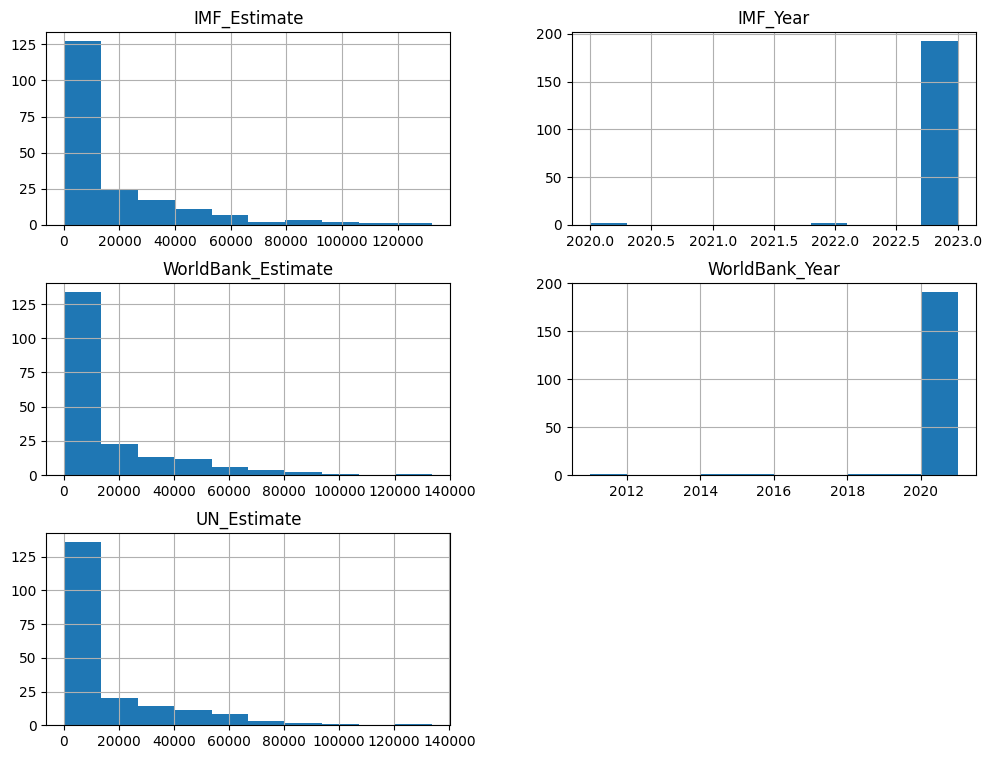

In [46]:
df.hist(figsize=(12,9))
plt.show()

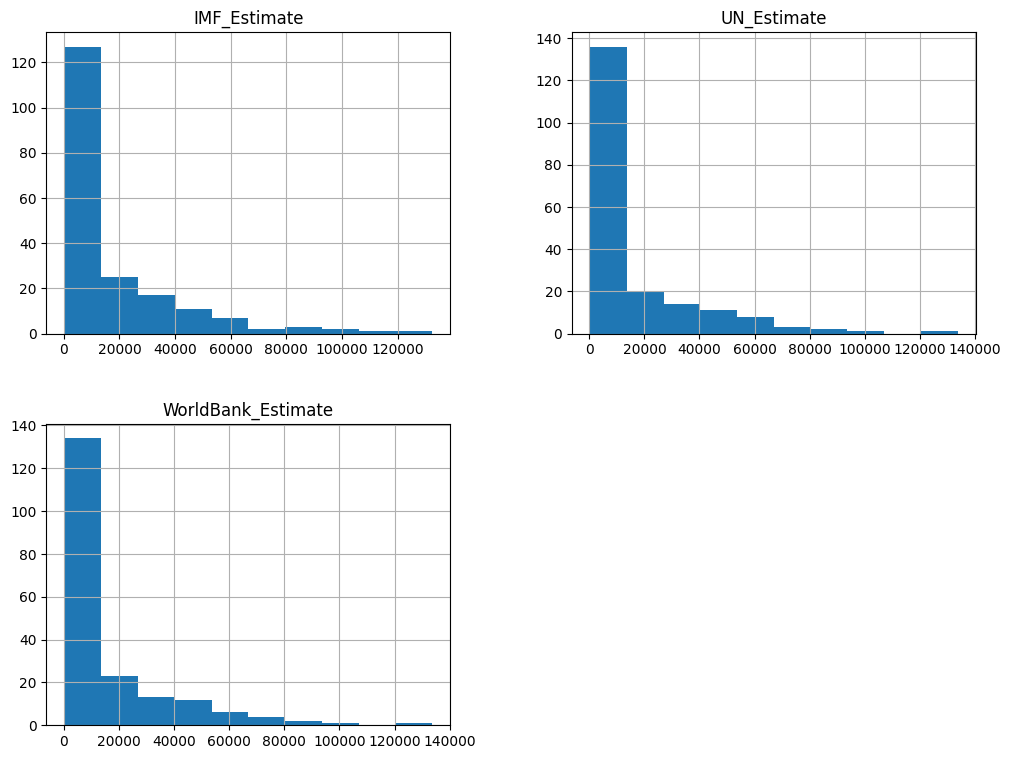

In [47]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(figsize=(12,9))

plt.show()

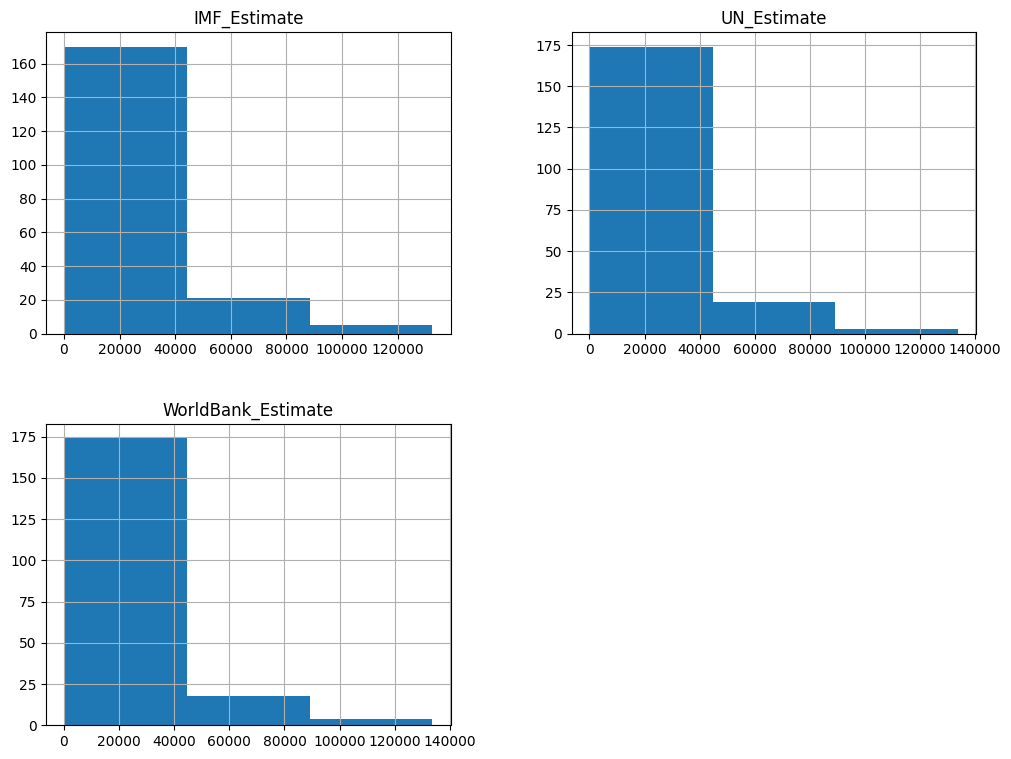

In [48]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=3, figsize=(12,9))

plt.show()

### Correlation Heatmap

In [49]:
df.corr()

<ipython-input-49-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate
IMF_Estimate,1.000,0.084,0.993,0.081,0.993
IMF_Year,0.084,1.000,0.079,-0.020,0.073
WorldBank_Estimate,0.993,0.079,1.000,0.061,0.998
WorldBank_Year,0.081,-0.020,0.061,1.000,0.079
UN_Estimate,0.993,0.073,0.998,0.079,1.000


<ipython-input-50-57afab5375fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


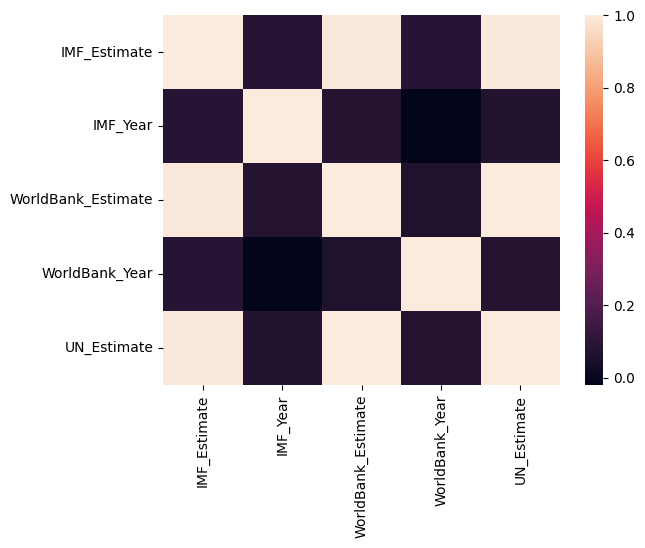

In [50]:
corr = df.corr()

sns.heatmap(corr)

plt.show()

<ipython-input-51-4afbc3f0d786>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


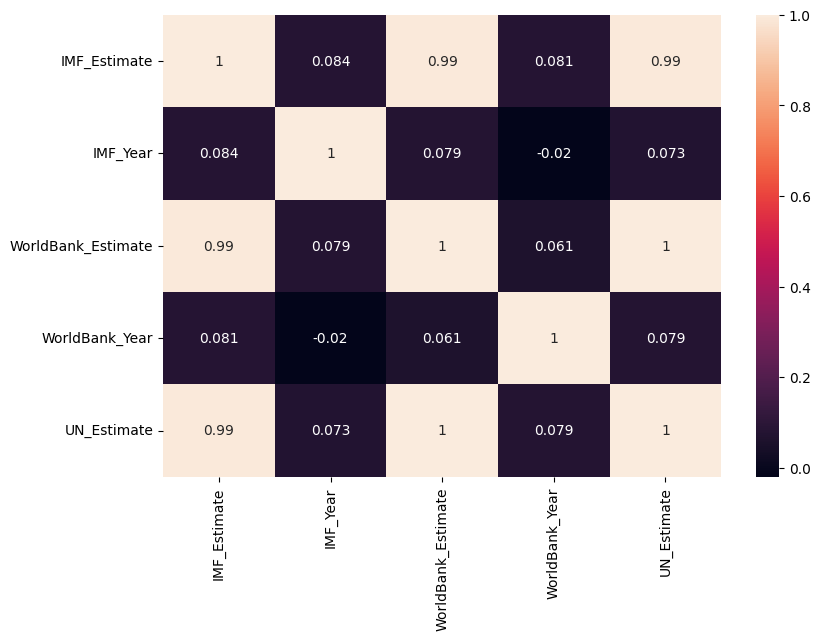

In [51]:
corr = df.corr()



plt.figure(figsize=(9,6))



sns.heatmap(corr, annot=True)



plt.show()

In [52]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

<ipython-input-53-d430e2edb18f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


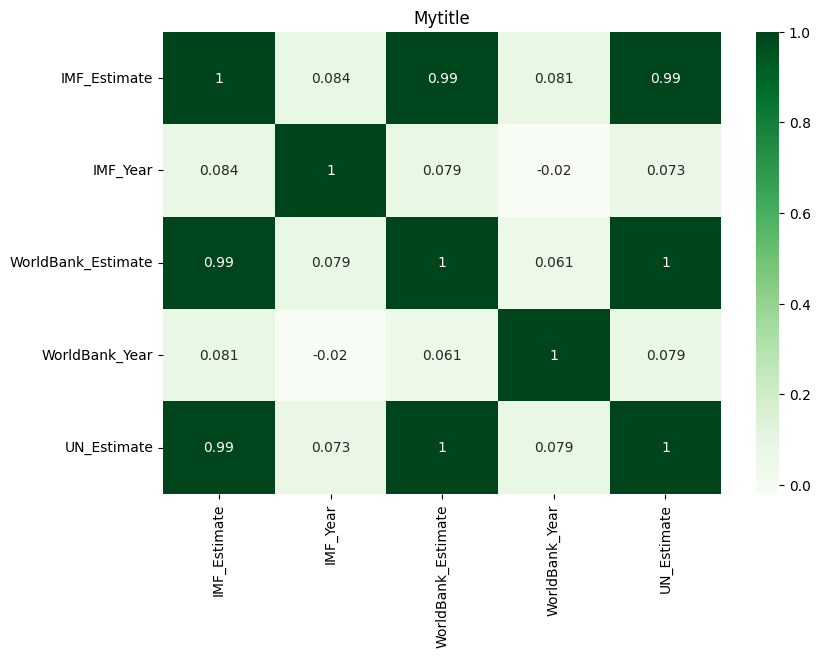

In [53]:
corr = df.corr()



plt.figure(figsize=(9,6))



sns.heatmap(corr, annot=True, cmap = 'Greens')

plt.title("Mytitle")

plt.show()

### Bar plot

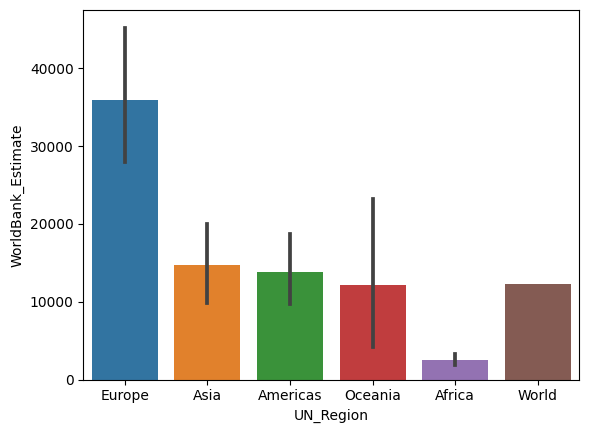

In [54]:
sns.barplot(x="UN_Region", y="WorldBank_Estimate", data=df)

plt.show()

<ipython-input-55-45244a744a1f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="WorldBank_Estimate", y="UN_Region", data=df, ci=None)


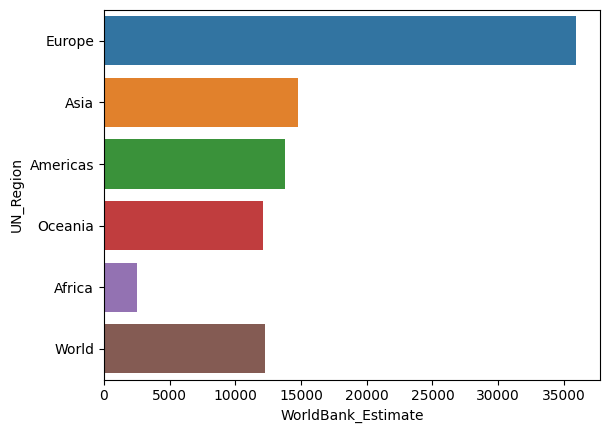

In [55]:
sns.barplot(x="WorldBank_Estimate", y="UN_Region", data=df, ci=None)

plt.show()

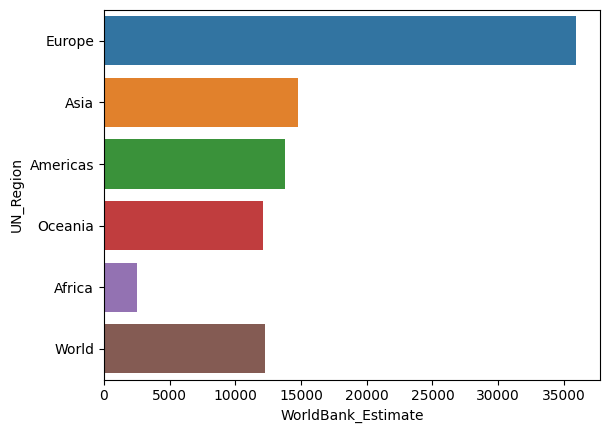

In [56]:
sns.barplot(x="WorldBank_Estimate", y="UN_Region", data=df, errorbar=None)



plt.show()

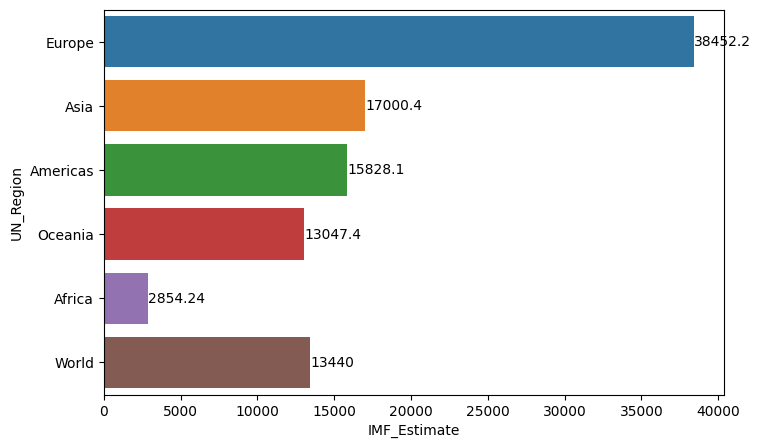

In [57]:
fig = plt.figure(figsize = (8,5))
ax = sns.barplot(x = "IMF_Estimate",  y = "UN_Region",
data = df, errorbar = None)
ax.bar_label(ax.containers[0])



plt.show()

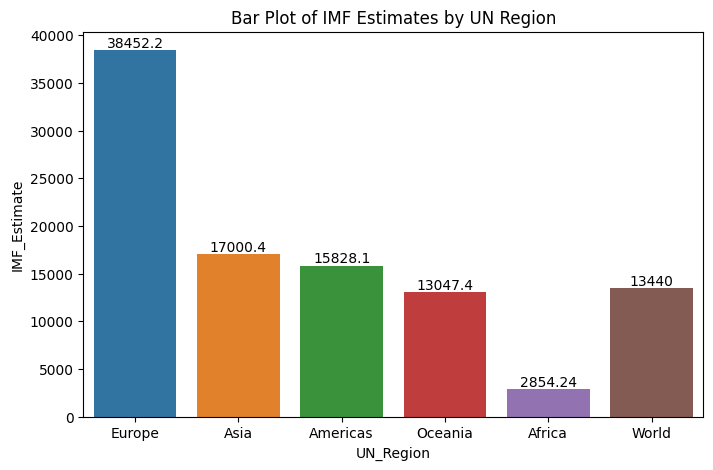

In [58]:
fig = plt.figure(figsize=(8, 5))



ax = sns.barplot(x="UN_Region", y="IMF_Estimate", data=df, errorbar=None)



ax.bar_label(ax.containers[0])



ax.set_title("Bar Plot of IMF Estimates by UN Region")



plt.show()

### Scatter Plot

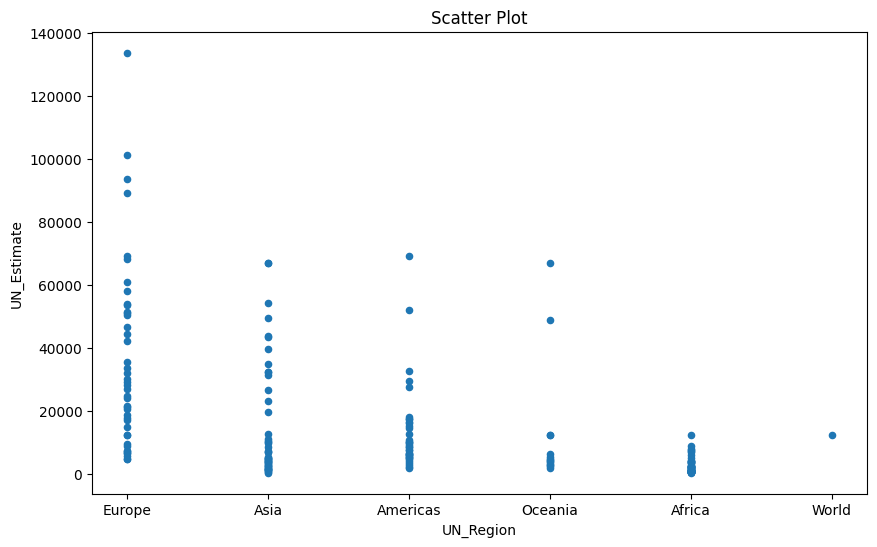

In [59]:
df.plot(x='UN_Region', y='UN_Estimate', kind='scatter',
        figsize=(10,6),
        title="Scatter Plot")

plt.show()

### Boxplot and Outliers

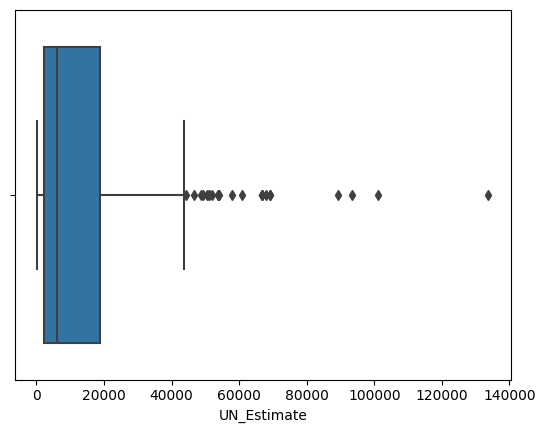

In [60]:
sns.boxplot(x=df["UN_Estimate"])

plt.show()

In [61]:
df[df["UN_Estimate"]>50000].head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
3,Luxembourg,Europe,132372.000,2023,133590.000,2021,133745.000,2021
4,Ireland,Europe,114581.000,2023,100172.000,2021,101109.000,2021
6,Norway,Europe,101103.000,2023,89154.000,2021,89242.000,2021
7,Switzerland,Europe,98767.000,2023,91992.000,2021,93525.000,2021
8,Singapore,Asia,91100.000,2023,72794.000,2021,66822.000,2021


In [62]:
df[df["UN_Estimate"]>100000]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
3,Luxembourg,Europe,132372.000,2023,133590.000,2021,133745.000,2021
4,Ireland,Europe,114581.000,2023,100172.000,2021,101109.000,2021


In [63]:
data=df[-(df["UN_Estimate"]>100000)]

In [64]:
df.shape

(196, 8)

In [65]:
data.shape

(194, 8)

<Axes: xlabel='UN_Estimate'>

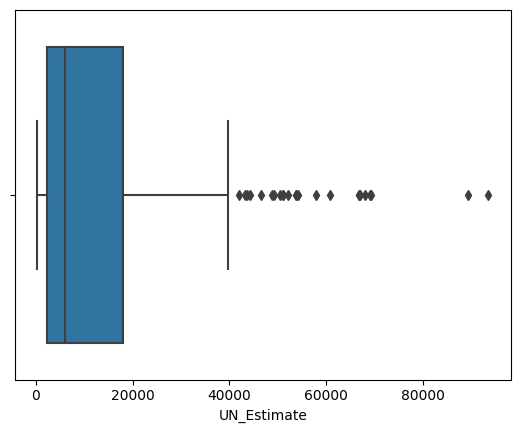

In [66]:
sns.boxplot(x=data["UN_Estimate"])

In [67]:
q_low = df["UN_Estimate"].quantile(0.25)
q_low

2270.0

In [68]:
q_hi = df["UN_Estimate"].quantile(0.75)
q_hi

18923.25

In [69]:
df_filtered = df[(df["UN_Estimate"] < q_hi) & (df["UN_Estimate"] > q_low)]

In [70]:
df_filtered.shape

(98, 8)

In [71]:
df_filtered.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
66,Uruguay,Americas,21677.000,2023,17313.000,2021,17313.000,2021
67,Barbados,Americas,21085.000,2023,17226.000,2021,17225.000,2021
69,Guyana,Americas,20539.000,2023,9999.000,2021,9999.000,2021
70,Croatia,Europe,20537.000,2023,17685.000,2021,16983.000,2021
72,Poland,Europe,19912.000,2023,18000.000,2021,17736.000,2021


In [72]:
df_filtered.UN_Estimate.mean()

7447.989795918367

In [73]:
#IQR

In [74]:
iqr = q_hi - q_low

In [76]:
lower_fence = q_low - (1.5*iqr)

In [77]:
upper_fence = q_hi + 1.5*iqr

In [78]:
df_no_outliers = df[(df["UN_Estimate"] > lower_fence) & (df["UN_Estimate"] < upper_fence)]

In [79]:
df_no_outliers.shape

(173, 8)